# 1. CONTEXTO

**INTRODUÇÃO, PROBLEMA DE PESQUISA E OBJETIVO:**

As regiões florestais do Brasil têm sido afetadas por grandes focos de incêndio, com uma tendência de alta nos últimos anos. Isso acarreta na destruição de biomas importantes para o nosso meio-ambiente e graves consequências de saúde, climáticas e econômicas.

As causas para o surgimento desses focos de incêndio são variadas, como por exemplo, fatores metereológicos como a baixa umidade do ar e as altas temperaturas (agravadas pelas mudanças climáticas), mas também podem ocorrer por ação humana.

Este trabalho tem por objetivo criar um modelo preditivo para determinar a quantidade de focos de queimada que podem surgir, dadas condições metereológicas específicas.

**DESCRIÇÃO DOS ARQUIVOS:**

* 'foco_incedio_inpe.csv' -  Contagem do número de focos de incêndio/queimadas de 1998 a 2024 por unidade da Federação. Compilados pela autora.
* 'metereologia_inmet.csv' -  Dados metereológicos diversos de 2014 a 2024. Compilados pela autora.
* 'catalogo_estacoes_inmet' - Lista das estações metereológicas do  Instituto Nacional de Meteorologia (INMET) com o código da estação e sua localização.

**FONTES:**

1. Instituto Nacional de Meteorologia (INMET). (2024). BDMEP: Banco de Dados Meteorológicos para Ensino e Pesquisa. https://portal.inmet.gov.br/bdmep

2. Instituto Nacional de Meteorologia (INMET). (2024).
Catálogo de Estações Automáticas. Ministério da Agricultura e Pecuária.
https://portal.inmet.gov.br/paginas/catalogoaut#

3. Instituto Nacional de Pesquisas Espaciais (INPE). (2024). TerraBrasilis: Plataforma de análise de queimadas. https://terrabrasilis.dpi.inpe.br/queimadas/portal/

4. Silva Junior, C. H. L., Pessôa, A. C. M., Carvalho, N. S., Reis, J. B. C., Anderson, L. O., & Aragão, L. E. O. C. (2021). Understanding Brazil’s catastrophic fires: Causes, consequences and policy needed to prevent future tragedies. Environmental Science & Policy, 127, 179–185. https://doi.org/10.1016/j.envsci.2021.10.021

#  2. PACOTES E BIBLIOTECAS

In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# 3. EXPLORAÇÃO DE DADOS

## 3.1. COLETA DE DADOS

In [98]:
!wget -q 'https://raw.githubusercontent.com/marinafso/Projeto-de-parceria-EBAC/refs/heads/main/foco_incedio_inpe.csv' -O foco_incedio_inpe.csv
!wget -q 'https://raw.githubusercontent.com/marinafso/Projeto-de-parceria-EBAC/refs/heads/main/metereologia_inmet.csv' -O metereologia_inmet.csv
!wget -q 'https://raw.githubusercontent.com/marinafso/Projeto-de-parceria-EBAC/refs/heads/main/catalogo_estacoes_inmet.csv' -O catalogo_estacoes_inmet.csv

## 3.2. WRANGLING DE ESTRUTURA

In [99]:
with open('foco_incedio_inpe.csv', mode='r', encoding='utf8') as file:
  data = file.read()

df_fogo = pd.read_csv('foco_incedio_inpe.csv', sep=',')
df_fogo.head()

,Ano,Mês,Valor,Estado
0,1998,Janeiro,NaN,Acre
1,1998,Fevereiro,NaN,Acre
2,1998,Março,NaN,Acre
3,1998,Abril,NaN,Acre
4,1998,Maio,NaN,Acre


In [100]:
df_fogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ano     8736 non-null   int64  
 1   Mês     8736 non-null   object 
 2   Valor   7974 non-null   float64
 3   Estado  8736 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 273.1+ KB


In [101]:
with open('metereologia_inmet.csv', mode='r', encoding='utf8') as file:
  data = file.read()

df_met = pd.read_csv('metereologia_inmet.csv', sep=',')
df_met.head()

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Nome Estacao,Codigo Estacao
0,2015-05-31,7.0,NaN,NaN,24.9,NaN,CRUZEIRO DO SUL,A108
1,2015-06-30,12.0,82.4,989.4,25.2,0.9,CRUZEIRO DO SUL,A108
2,2015-07-31,13.0,80.8,989.0,25.4,0.8,CRUZEIRO DO SUL,A108
3,2015-08-31,8.0,71.4,987.8,26.4,0.9,CRUZEIRO DO SUL,A108
4,2015-09-30,17.0,90.6,986.8,26.6,0.9,CRUZEIRO DO SUL,A108


In [102]:
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71896 entries, 0 to 71895
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data Medicao                                           71896 non-null  object 
 1   NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)  54503 non-null  float64
 2   PRECIPITACAO TOTAL, MENSAL (AUT)(mm)                   49818 non-null  float64
 3   PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)            56665 non-null  float64
 4   TEMPERATURA MEDIA, MENSAL (AUT)(°C)                    58005 non-null  float64
 5   VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)              53941 non-null  float64
 6   Nome Estacao                                           71896 non-null  object 
 7   Codigo Estacao                                         71896 non-null  object 
dtypes: float64(5), object(3)
memory usage: 4.4+ MB


In [103]:
with open('catalogo_estacoes_inmet.csv', mode='r', encoding='utf8') as file:
  data = file.read()

df_estacoes = pd.read_csv('catalogo_estacoes_inmet.csv', sep=';')
df_estacoes.head()

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
0,ABROLHOS,BA,Pane,"-17,96305555","-38,70333333","20,93",20/07/2008,A422
1,ACARAU,CE,Pane,"-3,1211111","-40,08722221","67,15",21/04/2009,A360
2,AFONSO CLAUDIO,ES,Operante,"-20,10416666","-41,10694444","507,48",23/09/2011,A657
3,AGUA BOA,MT,Operante,"-14,01638888","-52,21166666",440,15/12/2006,A908
4,AGUA CLARA,MS,Operante,"-20,44444444","-52,87583332","323,63",13/08/2010,A756


In [104]:
df_estacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DC_NOME             564 non-null    object
 1   SG_ESTADO           564 non-null    object
 2   CD_SITUACAO         564 non-null    object
 3   VL_LATITUDE         564 non-null    object
 4   VL_LONGITUDE        564 non-null    object
 5   VL_ALTITUDE         564 non-null    object
 6   DT_INICIO_OPERACAO  564 non-null    object
 7   CD_ESTACAO          564 non-null    object
dtypes: object(8)
memory usage: 35.4+ KB


### DataFrame Focos de Incêndio

In [105]:
# Mudança de valores NaN para valores numéricos:

df_fogo.fillna({'Valor': 0}, inplace=True)
df_fogo.head()

,Ano,Mês,Valor,Estado
0,1998,Janeiro,0.0,Acre
1,1998,Fevereiro,0.0,Acre
2,1998,Março,0.0,Acre
3,1998,Abril,0.0,Acre
4,1998,Maio,0.0,Acre


In [106]:
df_fogo = df_fogo.rename(columns={'Valor':'focos_incendio'})

In [107]:
# remoção de dados anteriores à 2014

df_fogo = df_fogo[df_fogo['Ano']>=2014]
df_fogo.head()

,Ano,Mês,focos_incendio,Estado
192,2014,Janeiro,0.0,Acre
193,2014,Fevereiro,0.0,Acre
194,2014,Março,1.0,Acre
195,2014,Abril,7.0,Acre
196,2014,Maio,1.0,Acre


### DataFrame Dados Metereológicos

In [108]:
# Ordenar dados por data em ordem crescente

df_met['Data Medicao'] = pd.to_datetime(df_met['Data Medicao'], format = '%Y-%m-%d')
df_met = df_met.sort_values(by='Data Medicao')
df_met.head()

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Nome Estacao,Codigo Estacao
57870,2014-01-31,17.0,189.8,963.1,26.5,1.2,PRESIDENTE PRUDENTE,A707
39198,2014-01-31,16.0,276.2,1004.6,25.9,1.0,INDAIAL,A817
39066,2014-01-31,16.0,186.8,1012.7,26.0,0.8,FLORIANOPOLIS,A806
38934,2014-01-31,20.0,203.4,905.3,21.4,2.7,CURITIBANOS,A860
2954,2014-01-31,26.0,226.8,1005.0,25.6,0.9,RIO URUBU,A125


In [109]:
# Criação das colunas Mês e Ano

df_met['Ano'] = df_met['Data Medicao'].dt.year
df_met['Mês'] = df_met['Data Medicao'].dt.month
df_met.head()

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Nome Estacao,Codigo Estacao,Ano,Mês
57870,2014-01-31,17.0,189.8,963.1,26.5,1.2,PRESIDENTE PRUDENTE,A707,2014,1
39198,2014-01-31,16.0,276.2,1004.6,25.9,1.0,INDAIAL,A817,2014,1
39066,2014-01-31,16.0,186.8,1012.7,26.0,0.8,FLORIANOPOLIS,A806,2014,1
38934,2014-01-31,20.0,203.4,905.3,21.4,2.7,CURITIBANOS,A860,2014,1
2954,2014-01-31,26.0,226.8,1005.0,25.6,0.9,RIO URUBU,A125,2014,1


In [110]:
# Remoção de colunas

df_met.drop(columns=['Data Medicao','Nome Estacao'], inplace=True)
df_met.head()

,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Codigo Estacao,Ano,Mês
57870,17.0,189.8,963.1,26.5,1.2,A707,2014,1
39198,16.0,276.2,1004.6,25.9,1.0,A817,2014,1
39066,16.0,186.8,1012.7,26.0,0.8,A806,2014,1
38934,20.0,203.4,905.3,21.4,2.7,A860,2014,1
2954,26.0,226.8,1005.0,25.6,0.9,A125,2014,1


In [111]:
# ordenação das colunas

df_met = df_met[['Ano','Mês','Codigo Estacao', 'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)','PRECIPITACAO TOTAL, MENSAL (AUT)(mm)','PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)','TEMPERATURA MEDIA, MENSAL (AUT)(°C)','VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)']]
df_met.head()

,Ano,Mês,Codigo Estacao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"
57870,2014,1,A707,17.0,189.8,963.1,26.5,1.2
39198,2014,1,A817,16.0,276.2,1004.6,25.9,1.0
39066,2014,1,A806,16.0,186.8,1012.7,26.0,0.8
38934,2014,1,A860,20.0,203.4,905.3,21.4,2.7
2954,2014,1,A125,26.0,226.8,1005.0,25.6,0.9


In [112]:
# Alteração dos valores da coluna 'Mês' de númerico para string

meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

df_met['Mês'] = df_met['Mês'].map(meses)
df_met.head()


,Ano,Mês,Codigo Estacao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"
57870,2014,Janeiro,A707,17.0,189.8,963.1,26.5,1.2
39198,2014,Janeiro,A817,16.0,276.2,1004.6,25.9,1.0
39066,2014,Janeiro,A806,16.0,186.8,1012.7,26.0,0.8
38934,2014,Janeiro,A860,20.0,203.4,905.3,21.4,2.7
2954,2014,Janeiro,A125,26.0,226.8,1005.0,25.6,0.9


### DataFrame Estações

In [113]:
df_estacoes.head()

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
0,ABROLHOS,BA,Pane,"-17,96305555","-38,70333333","20,93",20/07/2008,A422
1,ACARAU,CE,Pane,"-3,1211111","-40,08722221","67,15",21/04/2009,A360
2,AFONSO CLAUDIO,ES,Operante,"-20,10416666","-41,10694444","507,48",23/09/2011,A657
3,AGUA BOA,MT,Operante,"-14,01638888","-52,21166666",440,15/12/2006,A908
4,AGUA CLARA,MS,Operante,"-20,44444444","-52,87583332","323,63",13/08/2010,A756


In [114]:
# Remoção de colunas

df_estacoes.drop(columns=['DC_NOME','CD_SITUACAO','VL_LATITUDE','VL_LONGITUDE','VL_ALTITUDE','DT_INICIO_OPERACAO'], inplace=True)
df_estacoes.head()

,SG_ESTADO,CD_ESTACAO
0,BA,A422
1,CE,A360
2,ES,A657
3,MT,A908
4,MS,A756


In [115]:
# Ordenação

df_estacoes = df_estacoes[['CD_ESTACAO','SG_ESTADO']]
df_estacoes.head()

,CD_ESTACAO,SG_ESTADO
0,A422,BA
1,A360,CE
2,A657,ES
3,A908,MT
4,A756,MS


In [116]:
# criação de uma coluna com o nome do estado

estados = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

df_estacoes['Estado'] = df_estacoes['SG_ESTADO'].map(estados)
df_estacoes.head()

,CD_ESTACAO,SG_ESTADO,Estado
0,A422,BA,Bahia
1,A360,CE,Ceará
2,A657,ES,Espírito Santo
3,A908,MT,Mato Grosso
4,A756,MS,Mato Grosso do Sul


In [117]:
df_estacoes.drop(columns=['SG_ESTADO'], inplace=True)
df_estacoes.head()

,CD_ESTACAO,Estado
0,A422,Bahia
1,A360,Ceará
2,A657,Espírito Santo
3,A908,Mato Grosso
4,A756,Mato Grosso do Sul


## Junção das tabelas

In [118]:
dados = df_estacoes.merge(df_met, left_on='CD_ESTACAO', right_on='Codigo Estacao')
dados.head()

,CD_ESTACAO,Estado,Ano,Mês,Codigo Estacao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"
0,A422,Bahia,2014,Janeiro,A422,11.0,46.6,1013.0,26.3,4.8
1,A422,Bahia,2014,Fevereiro,A422,16.0,86.8,1012.2,27.0,4.6
2,A422,Bahia,2014,Março,A422,3.0,NaN,NaN,NaN,NaN
3,A422,Bahia,2014,Abril,A422,NaN,NaN,NaN,NaN,NaN
4,A422,Bahia,2014,Maio,A422,NaN,NaN,NaN,NaN,NaN


In [119]:
# tratamento de valores nulos: substituição dos valores nulos pela média do mês de cada estado

dados_met = [
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)',
    'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)',
    'TEMPERATURA MEDIA, MENSAL (AUT)(°C)',
    'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)'
]

dados[dados_met] = dados.groupby(['Estado', 'Mês'])[dados_met]\
    .transform(lambda x: x.fillna(x.mean()))

dados[dados_met] = dados[dados_met].round(2)
dados.head()

,CD_ESTACAO,Estado,Ano,Mês,Codigo Estacao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"
0,A422,Bahia,2014,Janeiro,A422,11.00,46.60,1013.00,26.30,4.80
1,A422,Bahia,2014,Fevereiro,A422,16.00,86.80,1012.20,27.00,4.60
2,A422,Bahia,2014,Março,A422,3.00,96.89,970.11,25.92,1.90
3,A422,Bahia,2014,Abril,A422,12.67,104.92,970.62,25.28,1.82
4,A422,Bahia,2014,Maio,A422,12.57,69.31,972.37,24.10,1.86


## 3.3. EXPLORAÇÃO DE SCHEMA

In [120]:
dados.duplicated().sum()

np.int64(0)

In [121]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70175 entries, 0 to 70174
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CD_ESTACAO                                             70175 non-null  object 
 1   Estado                                                 70175 non-null  object 
 2   Ano                                                    70175 non-null  int32  
 3   Mês                                                    70175 non-null  object 
 4   Codigo Estacao                                         70175 non-null  object 
 5   NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)  70175 non-null  float64
 6   PRECIPITACAO TOTAL, MENSAL (AUT)(mm)                   70175 non-null  float64
 7   PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)            70175 non-null  float64
 8   TEMPERATURA MEDIA, MENSAL (AUT)(°C)           

# 4. MANIPULAÇÃO

In [122]:
# Existem mais de uma estação metereológica por estado. Será calculada a média mensal dos dados metereológicos por estado.

dados_media_estadual = dados.groupby(['Estado', 'Ano', 'Mês'])[dados_met].mean().reset_index()
dados_media_estadual[dados_met] = dados_media_estadual[dados_met].round(2)
dados_media_estadual



,Estado,Ano,Mês,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"
0,Acre,2014,Abril,20.21,204.19,988.74,25.19,0.96
1,Acre,2014,Agosto,9.49,47.89,991.40,24.52,0.98
2,Acre,2014,Dezembro,21.76,281.35,987.00,25.20,1.14
3,Acre,2014,Fevereiro,19.74,257.76,987.61,25.21,1.25
4,Acre,2014,Janeiro,24.44,272.08,987.91,25.18,1.34
...,...,...,...,...,...,...,...,...
3559,Tocantins,2024,Maio,2.86,13.64,977.43,26.47,1.42
3560,Tocantins,2024,Março,18.00,233.58,976.33,26.61,1.23
3561,Tocantins,2024,Novembro,14.08,183.16,977.56,26.55,1.49
3562,Tocantins,2024,Outubro,9.01,91.04,975.86,28.44,1.62


In [123]:
#junção com o dataset de focos de incêndio

dados_compilados = dados_media_estadual.merge(df_fogo, left_on=['Ano','Mês','Estado'], right_on=['Ano','Mês','Estado'])
dados_compilados['focos_incendio'] = dados_compilados['focos_incendio'].astype(int)
dados_compilados

,Estado,Ano,Mês,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",focos_incendio
0,Acre,2014,Abril,20.21,204.19,988.74,25.19,0.96,7
1,Acre,2014,Agosto,9.49,47.89,991.40,24.52,0.98,1263
2,Acre,2014,Dezembro,21.76,281.35,987.00,25.20,1.14,8
3,Acre,2014,Fevereiro,19.74,257.76,987.61,25.21,1.25,0
4,Acre,2014,Janeiro,24.44,272.08,987.91,25.18,1.34,0
...,...,...,...,...,...,...,...,...,...
3427,Tocantins,2024,Maio,2.86,13.64,977.43,26.47,1.42,1332
3428,Tocantins,2024,Março,18.00,233.58,976.33,26.61,1.23,226
3429,Tocantins,2024,Novembro,14.08,183.16,977.56,26.55,1.49,475
3430,Tocantins,2024,Outubro,9.01,91.04,975.86,28.44,1.62,1386


In [124]:
# alteração dos nomes das colunas

dados_compilados.rename(columns={
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)': 'media_precipitacao_dias',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)': 'media_precipitacao_mm',
    'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)': 'media_pressao_mb',
    'TEMPERATURA MEDIA, MENSAL (AUT)(°C)': 'media_temperatura_c',
    'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)': 'media_velocidade_vento_ms',
    'focos_incendio': 'focos_incendio_soma',
    'Estado': 'estado',
    'Mês': 'mes',
    'Ano': 'ano'
}, inplace=True)

# alteração da ordem das colunas

dados_compilados = dados_compilados[['ano','mes','estado','media_precipitacao_dias','media_precipitacao_mm','media_pressao_mb','media_temperatura_c','media_velocidade_vento_ms','focos_incendio_soma']]


dados_compilados.head()

,ano,mes,estado,media_precipitacao_dias,media_precipitacao_mm,media_pressao_mb,media_temperatura_c,media_velocidade_vento_ms,focos_incendio_soma
0,2014,Abril,Acre,20.21,204.19,988.74,25.19,0.96,7
1,2014,Agosto,Acre,9.49,47.89,991.40,24.52,0.98,1263
2,2014,Dezembro,Acre,21.76,281.35,987.00,25.20,1.14,8
3,2014,Fevereiro,Acre,19.74,257.76,987.61,25.21,1.25,0
4,2014,Janeiro,Acre,24.44,272.08,987.91,25.18,1.34,0


In [125]:
ordem_meses = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

dados_compilados.sort_values(by=['ano','mes','estado'], key=lambda col: col.map(ordem_meses) if col.name == 'mes' else col,
    inplace=True
)
dados_compilados.head()

,ano,mes,estado,media_precipitacao_dias,media_precipitacao_mm,media_pressao_mb,media_temperatura_c,media_velocidade_vento_ms,focos_incendio_soma
4,2014,Janeiro,Acre,24.44,272.08,987.91,25.18,1.34,0
136,2014,Janeiro,Alagoas,8.33,30.93,999.90,26.47,2.77,49
268,2014,Janeiro,Amapá,23.64,297.68,1009.39,25.50,1.51,25
400,2014,Janeiro,Amazonas,20.58,245.32,1003.97,26.24,0.97,71
532,2014,Janeiro,Bahia,11.87,51.24,970.35,25.28,2.30,123


# 5. VISUALIZAÇÃO

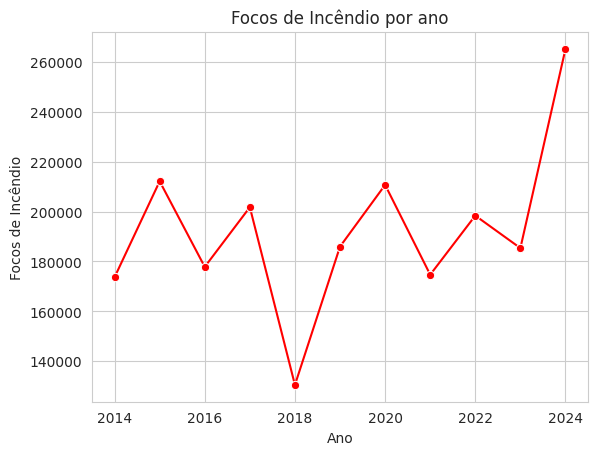

In [126]:
# gráfico de focos de incêndio por ano

focos_total = dados_compilados[['ano','focos_incendio_soma']].groupby('ano').agg('sum').reset_index()

with sns.axes_style('whitegrid'):
  grafico_foco = sns.lineplot(data=focos_total, x="ano", y="focos_incendio_soma", color="red", marker="o")
  grafico_foco.set(title='Focos de Incêndio por ano', xlabel='Ano', ylabel='Focos de Incêndio');

**Considerações:** É possível observar que o total de focos de incêndio registrados segue uma tendência de altas e baixas a cada ano, com uma queda acentuada em 2018 e uma alta vertiginosa em 2024. No entanto é possível observar que a tendência geral é de aumento dos casos com o passar dos anos.

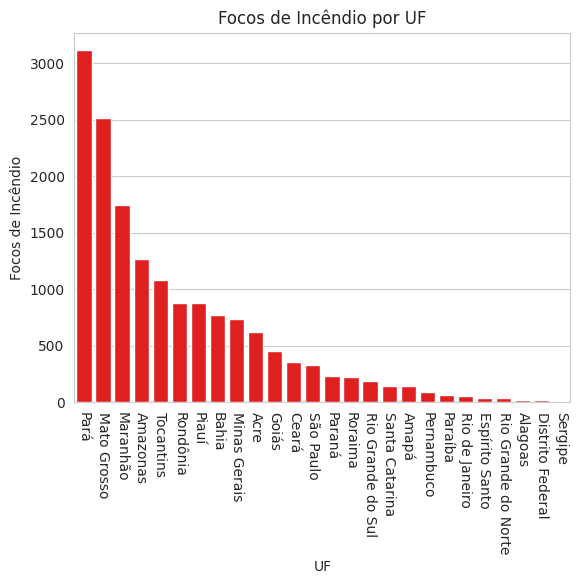

In [127]:
# gráfico de focos de incêndio por UF

focos_uf = dados_compilados[['estado','focos_incendio_soma']].groupby('estado').agg('mean').reset_index()
focos_uf.sort_values(by='focos_incendio_soma', ascending=False, inplace=True)

with sns.axes_style('whitegrid'):
  grafico_uf = sns.barplot(data=focos_uf, x="estado", y="focos_incendio_soma", color="red")
  grafico_uf.set(title='Focos de Incêndio por UF', xlabel='UF', ylabel='Focos de Incêndio');
  plt.xticks(rotation=-90)


**Considerações:** As unidades da Federação com o maior número de registros de focos de incêndio registrados ao longo dos últimos 10 anos são: Pará (com mais de 3000 casos), Mato Grosso (2500), Maranhão (aproximadamente 1600), Amazonas(1250) e Tocantins (mais de 1000).

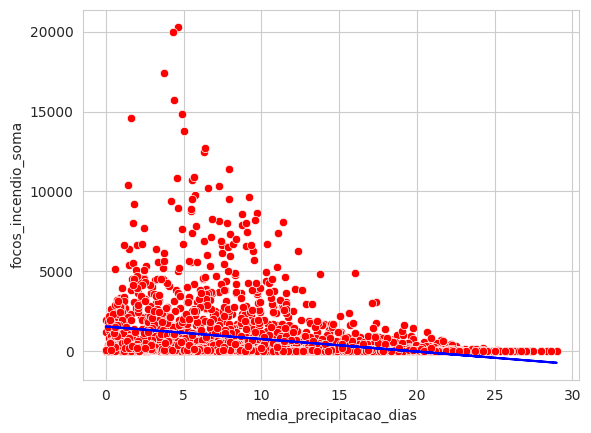

In [128]:
x = dados_compilados["media_precipitacao_dias"]
y = dados_compilados["focos_incendio_soma"]
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b

with sns.axes_style('whitegrid'):
  corr_1 = sns.scatterplot(data=dados_compilados, x=x, y=y, color="red")
  plt.plot(x, y_pred, color='blue')
  plt.show()

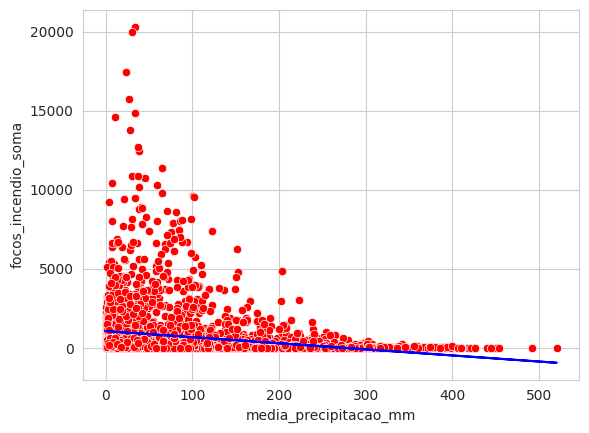

In [129]:
#linha de tendência

x = dados_compilados["media_precipitacao_mm"]
y = dados_compilados["focos_incendio_soma"]
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b

with sns.axes_style('whitegrid'):
    corr_2 = sns.scatterplot(data=dados_compilados, x=x, y=y, color="red")
    plt.plot(x, y_pred, color='blue')
    plt.show()

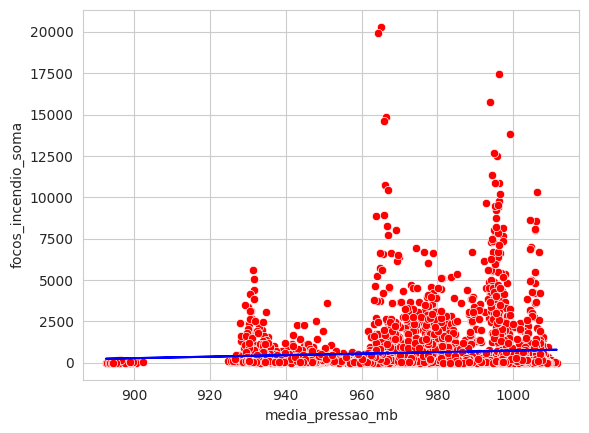

In [130]:
x = dados_compilados["media_pressao_mb"]
y = dados_compilados["focos_incendio_soma"]
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b

with sns.axes_style('whitegrid'):
    corr_3 = sns.scatterplot(data=dados_compilados, x=x, y=y, color="red")
    plt.plot(x, y_pred, color='blue')
    plt.show()

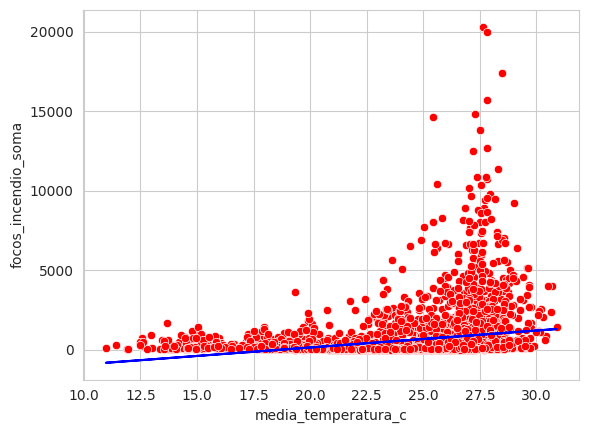

In [131]:
x = dados_compilados["media_temperatura_c"]
y = dados_compilados["focos_incendio_soma"]
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b

with sns.axes_style('whitegrid'):
    corr_4 = sns.scatterplot(data=dados_compilados, x=x, y=y, color="red")
    plt.plot(x, y_pred, color='blue')
    plt.show()

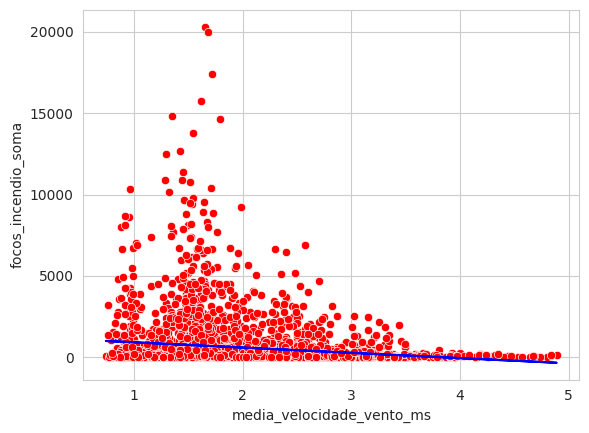

In [132]:
x = dados_compilados["media_velocidade_vento_ms"]
y = dados_compilados["focos_incendio_soma"]
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b

with sns.axes_style('whitegrid'):
    corr_5 = sns.scatterplot(data=dados_compilados, x=x, y=y, color="red")
    plt.plot(x, y_pred, color='blue')
    plt.show()

# 6. PADRONIZAÇÃO

In [133]:
# definição das colunas numéricas

print(dados_compilados.select_dtypes(include = ['int64','float64']).columns)

Index(['media_precipitacao_dias', 'media_precipitacao_mm', 'media_pressao_mb',
       'media_temperatura_c', 'media_velocidade_vento_ms',
       'focos_incendio_soma'],
      dtype='object')


In [134]:
# calculo da média e desvio-padrão das colunas numéricas

precipitacao_dia_mean = dados_compilados['media_precipitacao_dias'].mean()
precipitacao_dia_std = dados_compilados['media_precipitacao_dias'].std()

precipitacao_mm_mean = dados_compilados['media_precipitacao_mm'].mean()
precipitacao_mm_std = dados_compilados['media_precipitacao_mm'].std()

pressao_mb_mean = dados_compilados['media_pressao_mb'].mean()
pressao_mb_std = dados_compilados['media_pressao_mb'].std()

temperatura_c_mean = dados_compilados['media_temperatura_c'].mean()
temperatura_c_std = dados_compilados['media_temperatura_c'].std()

velocidade_vento_ms_mean = dados_compilados['media_velocidade_vento_ms'].mean()
velocidade_vento_ms_std = dados_compilados['media_velocidade_vento_ms'].std()

focos_incendio_soma_mean = dados_compilados['focos_incendio_soma'].mean()
focos_incendio_soma_std = dados_compilados['focos_incendio_soma'].std()

In [135]:
print(f'Média da coluna "media_precipitacao_dias": {precipitacao_dia_mean}')
print(f'Desvio-padrão da coluna "media_precipitacao_dias": {precipitacao_dia_std}')

print(f'Média da coluna "media_precipitacao_mm": {precipitacao_mm_mean}')
print(f'Desvio-padrão da coluna "media_precipitacao_mm": {precipitacao_mm_std}')

print(f'Média da coluna "media_pressao_mb": {pressao_mb_mean}')
print(f'Desvio-padrão da coluna "media_pressao_mb": {pressao_mb_std}')

print(f'Média da coluna "media_temperatura_c": {temperatura_c_mean}')
print(f'Desvio-padrão da coluna "media_temperatura_c": {temperatura_c_std}')

print(f'Média da coluna "media_velocidade_vento_ms": {velocidade_vento_ms_mean}')
print(f'Desvio-padrão da coluna "media_velocidade_vento_ms": {velocidade_vento_ms_std}')

print(f'Média da coluna "focos_incendio_soma": {focos_incendio_soma_mean}')
print(f'Desvio-padrão da coluna "focos_incendio_soma": {focos_incendio_soma_std}')

Média da coluna "media_precipitacao_dias": 11.788505244755243
Desvio-padrão da coluna "media_precipitacao_dias": 6.211954361064014
Média da coluna "media_precipitacao_mm": 118.03166666666668
Desvio-padrão da coluna "media_precipitacao_mm": 96.40792479055376
Média da coluna "media_pressao_mb": 974.2122756410257
Desvio-padrão da coluna "media_pressao_mb": 27.408615720565738
Média da coluna "media_temperatura_c": 24.57669289044289
Desvio-padrão da coluna "media_temperatura_c": 3.1449912139823786
Média da coluna "media_velocidade_vento_ms": 1.9184498834498833
Desvio-padrão da coluna "media_velocidade_vento_ms": 0.6648065076548327
Média da coluna "focos_incendio_soma": 616.6576340326341
Desvio-padrão da coluna "focos_incendio_soma": 1542.9422366910183


In [136]:
# padronização

dados_compilados['precipitacao_dias_pad'] = ((dados_compilados['media_precipitacao_dias'] - precipitacao_dia_mean) / precipitacao_dia_std)
dados_compilados['precipitacao_mm_pad'] = ((dados_compilados['media_precipitacao_mm'] - precipitacao_mm_mean) / precipitacao_mm_std)
dados_compilados['pressao_mb_pad'] = ((dados_compilados['media_pressao_mb'] - pressao_mb_mean) / pressao_mb_std)
dados_compilados['temperatura_c_pad'] = ((dados_compilados['media_temperatura_c'] - temperatura_c_mean) / temperatura_c_std)
dados_compilados['velocidade_vento_ms_pad'] = ((dados_compilados['media_velocidade_vento_ms'] - velocidade_vento_ms_mean) / velocidade_vento_ms_std)
dados_compilados['focos_incendio_soma_pad'] = ((dados_compilados['focos_incendio_soma'] - focos_incendio_soma_mean) / focos_incendio_soma_std)

dados_compilados.head()

,ano,mes,estado,media_precipitacao_dias,media_precipitacao_mm,media_pressao_mb,media_temperatura_c,media_velocidade_vento_ms,focos_incendio_soma,precipitacao_dias_pad,precipitacao_mm_pad,pressao_mb_pad,temperatura_c_pad,velocidade_vento_ms_pad,focos_incendio_soma_pad
4,2014,Janeiro,Acre,24.44,272.08,987.91,25.18,1.34,0,2.036637,1.597880,0.499760,0.191831,-0.870103,-0.399663
136,2014,Janeiro,Alagoas,8.33,30.93,999.90,26.47,2.77,49,-0.556750,-0.903470,0.937213,0.602007,1.280899,-0.367906
268,2014,Janeiro,Amapá,23.64,297.68,1009.39,25.50,1.51,25,1.907853,1.863419,1.283455,0.293580,-0.614389,-0.383461
400,2014,Janeiro,Amazonas,20.58,245.32,1003.97,26.24,0.97,71,1.415254,1.320310,1.085707,0.528875,-1.426656,-0.353647
532,2014,Janeiro,Bahia,11.87,51.24,970.35,25.28,2.30,123,0.013119,-0.692803,-0.140915,0.223628,0.573927,-0.319946


In [137]:
# limpeza

dados_padronizados = dados_compilados.drop(columns=[
    'ano',
    'mes',
    'estado',
    'media_precipitacao_dias',
    'media_precipitacao_mm',
    'media_pressao_mb',
    'media_temperatura_c',
    'media_velocidade_vento_ms',
    'focos_incendio_soma'
])

dados_padronizados.head()

,precipitacao_dias_pad,precipitacao_mm_pad,pressao_mb_pad,temperatura_c_pad,velocidade_vento_ms_pad,focos_incendio_soma_pad
4,2.036637,1.597880,0.499760,0.191831,-0.870103,-0.399663
136,-0.556750,-0.903470,0.937213,0.602007,1.280899,-0.367906
268,1.907853,1.863419,1.283455,0.293580,-0.614389,-0.383461
400,1.415254,1.320310,1.085707,0.528875,-1.426656,-0.353647
532,0.013119,-0.692803,-0.140915,0.223628,0.573927,-0.319946


# 7. MODELAGEM

## 7.1. DADOS

In [138]:
# variáveis independentes (x)

x = dados_padronizados[[
    'precipitacao_dias_pad',
    'precipitacao_mm_pad',
    'pressao_mb_pad',
    'temperatura_c_pad',
    'velocidade_vento_ms_pad'
]]

# variável dependente (y)

y = dados_padronizados['focos_incendio_soma_pad']

In [139]:
# separação da base de dados entre teste e modelo (1/3)

predictors_train, predictors_test, target_train, target_test = train_test_split(
    x,
    y,
    test_size=0.333,
    random_state=123
)

In [140]:
predictors_train.head()

,precipitacao_dias_pad,precipitacao_mm_pad,pressao_mb_pad,temperatura_c_pad,velocidade_vento_ms_pad
1618,0.373714,0.507825,-1.202260,-1.407537,0.513759
2752,1.035342,2.150325,0.135641,0.271323,-0.704641
1908,1.682481,2.366075,0.798571,0.430306,-1.336404
3166,-0.724169,-1.022859,0.886864,0.404868,1.536613
1246,-0.954370,-0.786986,0.781058,1.215681,-0.479011


In [141]:
predictors_train.shape

(2289, 5)

## 7.2. TREINO

In [142]:
model = LinearRegression()
model.fit(predictors_train, target_train)

LinearRegression()

In [143]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precipitacao_dias_pad', 'precipitacao_mm_pad', 'pressao_mb_pad',
        'temperatura_c_pad', 'velocidade_vento_ms_pad'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-0.45634246,  0.02768276,  0.03361502,  0.1374321 , -0.30396165]),
 'rank_': 5,
 'singular_': array([70.9507725 , 59.00129876, 39.64727607, 31.953557  , 15.90275257]),
 'intercept_': np.float64(-0.0008091961546830475)}

# 8. PREDIÇÃO

In [144]:
dados_novos = {
    'media_precipitacao_dias_novo': 8,
    'media_precipitacao_mm_novo': 100.3,
    'media_pressao_mb_novo': 1010.6,
    'media_temperatura_c_novo': 26.8,
    'media_velocidade_vento_ms_novo': 2.3
}

dados_novos = pd.DataFrame([dados_novos])
dados_novos

,media_precipitacao_dias_novo,media_precipitacao_mm_novo,media_pressao_mb_novo,media_temperatura_c_novo,media_velocidade_vento_ms_novo
0,8,100.3,1010.6,26.8,2.3


In [145]:
foco_novo = np.array(dados_novos)
print(foco_novo)


[[   8.   100.3 1010.6   26.8    2.3]]


In [146]:
foco_pred = model.predict(foco_novo.reshape(1, -1))
print(int(foco_pred))

36


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-146-7985ed492af1>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(foco_pred))


**Interpretação:** Com as condições metereológicas informadas, é possível que ocorram 36 focos de queimada na localidade.

# 9. AVALIAÇÃO

In [147]:
target_predicted = model.predict(predictors_test)
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.8329261353267379


In [148]:
r2 = r2_score(target_test, target_predicted)
print(r2)

0.2259172870178633


**Interpretação:** Com o  indicador RMSE de 0.83 é possível observar que o modelo gerado não é o ideal para prever o resultado da variável independente, isso é colaborado pelo R^2, que indica que o modelo explica apenas 22.59% dos dados. Pode-se inferir então, que unicamente, as variáveis metereológicas não as responsáveis pelos focos de queimadas; podendo existir outros fatores, como indicado no início, como por exemplo, a ação humana.